In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

In [2]:
f = '/Users/a1/Desktop/算法实战/house_price_predict/'
os.chdir(f)

In [3]:
train_df = pd.read_csv('train.csv', index_col=0)
test_df = pd.read_csv('test.csv', index_col=0)

In [4]:
print(train_df.shape)
print(test_df.shape)

(1460, 80)
(1459, 79)


In [5]:
y_train = np.log1p(train_df.pop("SalePrice")) #提取train_df中的label，并log1p平滑

In [6]:
y_train.head()

Id
1    12.247699
2    12.109016
3    12.317171
4    11.849405
5    12.429220
Name: SalePrice, dtype: float64

In [7]:
all_df = pd.concat((train_df, test_df), axis = 0) #按行整合

In [8]:
all_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [9]:
all_df['MSSubClass'] = all_df['MSSubClass'].astype(str)
pd.get_dummies(all_df['MSSubClass']).head()

,120,150,160,180,190,20,30,40,45,50,60,70,75,80,85,90
Id,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [10]:
all_dummy_df = pd.get_dummies(all_df)

In [11]:
all_dummy_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,...,0,0,0,1,0,0,0,0,1,0
2,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,...,0,0,0,1,0,0,0,0,1,0
3,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,...,0,0,0,1,0,0,0,0,1,0
4,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,...,0,0,0,1,1,0,0,0,0,0
5,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,...,0,0,0,1,0,0,0,0,1,0


In [12]:
all_dummy_df.isnull().sum().sort_values(ascending= False)

LotFrontage             486
GarageYrBlt             159
MasVnrArea               23
BsmtHalfBath              2
BsmtFullBath              2
BsmtFinSF2                1
GarageCars                1
TotalBsmtSF               1
BsmtUnfSF                 1
GarageArea                1
BsmtFinSF1                1
Condition1_Artery         0
Condition2_Feedr          0
Condition2_Artery         0
Neighborhood_Somerst      0
Neighborhood_StoneBr      0
Neighborhood_Timber       0
Neighborhood_Veenker      0
Condition1_Feedr          0
Condition1_RRAn           0
Condition1_RRNn           0
Condition1_RRNe           0
Condition1_Norm           0
Condition1_PosA           0
Neighborhood_SawyerW      0
Condition1_RRAe           0
Condition1_PosN           0
Neighborhood_OldTown      0
Neighborhood_Sawyer       0
Neighborhood_MeadowV      0
                       ... 
BsmtFinType2_ALQ          0
BsmtFinType2_BLQ          0
BsmtFinType2_GLQ          0
BsmtFinType2_LwQ          0
BsmtFinType2_Rec    

In [13]:
mean_cols = all_dummy_df.mean()
mean_cols.head()

LotFrontage       69.305795
LotArea        10168.114080
OverallQual        6.089072
OverallCond        5.564577
YearBuilt       1971.312778
dtype: float64

In [14]:
all_dummy_df = all_dummy_df.fillna(mean_cols)

In [15]:
all_dummy_df.isnull().sum()

LotFrontage              0
LotArea                  0
OverallQual              0
OverallCond              0
YearBuilt                0
YearRemodAdd             0
MasVnrArea               0
BsmtFinSF1               0
BsmtFinSF2               0
BsmtUnfSF                0
TotalBsmtSF              0
1stFlrSF                 0
2ndFlrSF                 0
LowQualFinSF             0
GrLivArea                0
BsmtFullBath             0
BsmtHalfBath             0
FullBath                 0
HalfBath                 0
BedroomAbvGr             0
KitchenAbvGr             0
TotRmsAbvGrd             0
Fireplaces               0
GarageYrBlt              0
GarageCars               0
GarageArea               0
WoodDeckSF               0
OpenPorchSF              0
EnclosedPorch            0
3SsnPorch                0
                        ..
GarageCond_TA            0
PavedDrive_N             0
PavedDrive_P             0
PavedDrive_Y             0
PoolQC_Ex                0
PoolQC_Fa                0
P

In [16]:
numeric_cols = all_df.columns[all_df.dtypes != 'object']
numeric_cols

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold'],
      dtype='object')

In [17]:
len(numeric_cols)

35

In [18]:
#a = pd.DataFrame({'a': [1,2], 'b':[2,3], 'c':[5,6], 'd':[7,8]})
#a

In [19]:
#xx = ['a', 'b', 'c', 'd']
#a[xx].mean()

In [20]:
#a.loc[:, xx].mean()

In [21]:
numeric_cols_mean = all_dummy_df.loc[:, numeric_cols].mean()
numeric_cols_std = all_dummy_df.loc[:, numeric_cols].std()
all_dummy_df.loc[:, numeric_cols] = (all_dummy_df.loc[:, numeric_cols] - numeric_cols_mean) / numeric_cols_std
print(all_dummy_df.head())
#print(all_dummy_df.dtypes)

    LotFrontage   LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                             
1     -0.202033 -0.217841     0.646073    -0.507197   1.046078      0.896679   
2      0.501785 -0.072032    -0.063174     2.187904   0.154737     -0.395536   
3     -0.061269  0.137173     0.646073    -0.507197   0.980053      0.848819   
4     -0.436639 -0.078371     0.646073    -0.507197  -1.859033     -0.682695   
5      0.689469  0.518814     1.355319    -0.507197   0.947040      0.753100   

    MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF          ...            \
Id                                                         ...             
1     0.525112    0.580807    -0.29308  -0.934702          ...             
2    -0.572152    1.177910    -0.29308  -0.629788          ...             
3     0.334770    0.097856    -0.29308  -0.288467          ...             
4    -0.572152   -0.494856    -0.29308  -0.047266          

In [22]:
dummy_train_df = all_dummy_df.loc[train_df.index]
dummy_test_df = all_dummy_df.loc[test_df.index]

In [23]:
print(dummy_train_df.shape)
print(dummy_test_df.shape)

(1460, 303)
(1459, 303)


In [24]:
dummy_train_df = dummy_train_df.fillna(mean_cols)
dummy_test_df = dummy_test_df.fillna(mean_cols)
dummy_train_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.202033,-0.217841,0.646073,-0.507197,1.046078,0.896679,0.525112,0.580807,-0.29308,-0.934702,...,0,0,0,1,0,0,0,0,1,0
2,0.501785,-0.072032,-0.063174,2.187904,0.154737,-0.395536,-0.572152,1.177910,-0.29308,-0.629788,...,0,0,0,1,0,0,0,0,1,0
3,-0.061269,0.137173,0.646073,-0.507197,0.980053,0.848819,0.334770,0.097856,-0.29308,-0.288467,...,0,0,0,1,0,0,0,0,1,0
4,-0.436639,-0.078371,0.646073,-0.507197,-1.859033,-0.682695,-0.572152,-0.494856,-0.29308,-0.047266,...,0,0,0,1,1,0,0,0,0,0
5,0.689469,0.518814,1.355319,-0.507197,0.947040,0.753100,1.387248,0.468851,-0.29308,-0.161040,...,0,0,0,1,0,0,0,0,1,0


In [25]:
dummy_test_df.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1461,0.501785,0.184340,-0.772420,0.391170,-0.340452,-1.113434,-0.572152,0.058342,0.558102,-0.661645,...,0,0,0,1,0,0,0,0,1,0
1462,0.548706,0.519702,-0.063174,0.391170,-0.439490,-1.257014,0.032463,1.057173,-0.293080,-0.352180,...,0,0,0,1,0,0,0,0,1,0
1463,0.220258,0.464294,-0.772420,-0.507197,0.848003,0.657380,-0.572152,0.767402,-0.293080,-0.964284,...,0,0,0,1,0,0,0,0,1,0
1464,0.407942,-0.024105,-0.063174,0.391170,0.881015,0.657380,-0.460186,0.352503,-0.293080,-0.538769,...,0,0,0,1,0,0,0,0,1,0
1465,-1.234298,-0.654636,1.355319,-0.507197,0.682939,0.370221,-0.572152,-0.391680,-0.293080,1.038136,...,0,0,0,1,0,0,0,0,1,0


In [26]:
X_train = dummy_train_df.values
X_test = dummy_test_df.values #再次注意，测试集最后用

In [27]:
X_train

array([[-0.20203292, -0.21784137,  0.6460727 , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.5017845 , -0.07203174, -0.06317371, ...,  0.        ,
         1.        ,  0.        ],
       [-0.06126943,  0.13717338,  0.6460727 , ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.15511176, -0.14278111,  0.6460727 , ...,  0.        ,
         1.        ,  0.        ],
       [-0.06126943, -0.0571972 , -0.77242013, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.2671787 , -0.02930318, -0.77242013, ...,  0.        ,
         1.        ,  0.        ]])

In [28]:
dummy_train_df.isnull().sum().sort_values(ascending= False)

SaleCondition_Partial    0
Neighborhood_NridgHt     0
Neighborhood_SWISU       0
Neighborhood_Sawyer      0
Neighborhood_SawyerW     0
Neighborhood_Somerst     0
Neighborhood_StoneBr     0
Neighborhood_Timber      0
Neighborhood_Veenker     0
Condition1_Artery        0
Condition1_Feedr         0
Condition1_Norm          0
Condition1_PosA          0
Condition1_PosN          0
Condition1_RRAe          0
Condition1_RRAn          0
Condition1_RRNe          0
Neighborhood_OldTown     0
Neighborhood_NoRidge     0
Condition2_Artery        0
Neighborhood_NWAmes      0
LandSlope_Sev            0
Neighborhood_Blmngtn     0
Neighborhood_Blueste     0
Neighborhood_BrDale      0
Neighborhood_BrkSide     0
Neighborhood_ClearCr     0
Neighborhood_CollgCr     0
Neighborhood_Crawfor     0
Neighborhood_Edwards     0
                        ..
BsmtFinType2_ALQ         0
BsmtFinType2_BLQ         0
BsmtFinType2_GLQ         0
BsmtFinType2_LwQ         0
BsmtFinType2_Rec         0
BsmtFinType2_Unf         0
H

In [29]:
#调包sklearn机器学习库
#通过上一个基础篇，我们知道列rideg最优对参数对alpha=15左右
from sklearn.linear_model import Ridge
ridge = Ridge(15)

#Bagging: 投票原理
#Bagging把很多的小分类器放在一起，每个train随机的一部分数据，然后把它们的最终结果综合起来（多数投票制）
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import cross_val_score


In [30]:
import matplotlib.pyplot as plt

In [31]:
params = [1, 10, 15, 20, 25, 30, 40]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=15, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))


Text(0.5,1,'Bagging_n_estimator vs CV Error')

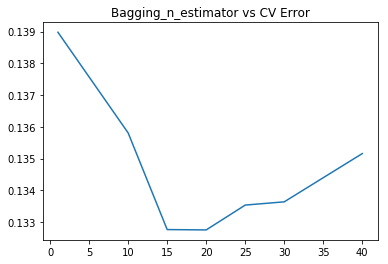

In [32]:
plt.plot(params, test_scores)
plt.title("Bagging_n_estimator vs CV Error")

In [33]:
from sklearn.ensemble import AdaBoostRegressor
params = [10, 15, 20, 25, 30, 35, 40, 50]
test_scores = []
for param in params:
    clf = BaggingRegressor(n_estimators=param, base_estimator=ridge)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

Text(0.5,1,'Boosting_n_estimator vs CV Error')

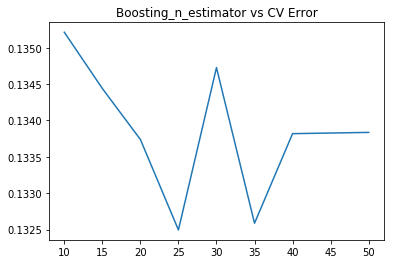

In [34]:
plt.plot(params, test_scores)
plt.title("Boosting_n_estimator vs CV Error")

In [35]:
br = BaggingRegressor(n_estimators = 10, base_estimator = ridge)

In [36]:
br.fit(X_train, y_train)

BaggingRegressor(base_estimator=Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         bootstrap=True, bootstrap_features=False, max_features=1.0,
         max_samples=1.0, n_estimators=10, n_jobs=1, oob_score=False,
         random_state=None, verbose=0, warm_start=False)

In [37]:
y_br = np.expm1(br.predict(X_test))

In [38]:
#data = pd.DataFrame({'Id':test_df.index, 'SalePrice':y_br})

In [ ]:
#data.head()

In [ ]:
#z1 = '/Users/a1/Desktop/算法实战/house_price_predict/House_price_advance_practice'
#data.to_csv('z1.csv', index=False)

In [40]:
#data.to_csv('example.csv')

In [41]:
from xgboost import XGBRegressor #安装xgboost 导入

In [ ]:
param = [1, 2, 3, 4, 5, 6]
test_scores = []
for param in params:
    clf = XGBRegressor(max_depth = param)
    test_score = np.sqrt(-cross_val_score(clf, X_train, y_train, cv=10, scoring='neg_mean_squared_error'))
    test_scores.append(np.mean(test_score))

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(params, test_scores)
plt.title("xgboost_Max_depth vs CV Error")

In [ ]:
xg = XGBRegressor(max_depth = 10)
xg.fit(X_train, y_train)

In [ ]:
y_xg = np.expm1(xg.predict(X_test))

In [ ]:
data_xgboost = pd.DataFrame({"Id":test_df.index, "SalePrice":y_xg})
data_xgboost.head()

In [ ]:
data_xgboost.to_csv('data_xgboost.csv', index = False)